In [1]:
options(stringsAsFactors=F)
rm(list=ls())
source("/Users/ll3515/Desktop/tools/R_functions/000.R_functions.R")
source("~/Dropbox/tools/R_functions/Liisi_functions.R")

In [2]:
library("fgsea")
library("ggplot2")

Loading required package: Rcpp


In [3]:
disGenes <- read.csv("Graph-based Genes.csv") 
# Median-normalised average
# All promoter sums per cluster
# Hide promoter sums with low average count

In [4]:
Head(disGenes)


	object class :  data.frame 



             FeatureID FeatureName Cluster.1.Average Cluster.1.Log2.Fold.Change
1  promoter_sum_P2ry13  P2ry13 Sum       0.019707283                  -2.213934
2   promoter_sum_Ptafr   Ptafr Sum       0.019144218                  -2.215784
3    promoter_sum_C1qb    C1qb Sum       0.003378391                  -4.662234
4  promoter_sum_Cryba4  Cryba4 Sum       0.009009044                  -3.272648
5    promoter_sum_Irf5    Irf5 Sum       0.042792958                  -1.840431
6   promoter_sum_Tgfb1   Tgfb1 Sum       0.097973351                  -1.724781
7  promoter_sum_Tyrobp  Tyrobp Sum       0.005067587                  -4.236429
8    promoter_sum_Cd33    Cd33 Sum       0.003378391                  -4.792151
9     promoter_sum_Fes     Fes Sum       0.082770589                  -1.676560
10  promoter_sum_Wdfy4   Wdfy4 Sum       0.005067587                  -3.846392
   Cluster.1.P.Value
1       4.252944e-25
2       1.704972e-24
3       6.863068e-48
4  

In [5]:
rownames(disGenes) = gsub(" Sum","",disGenes$FeatureName)
disGenes = as.matrix(disGenes[,-c(1,2)])
Head(disGenes)


	object class :  matrix 



       Cluster.1.Average Cluster.1.Log2.Fold.Change Cluster.1.P.Value
P2ry13       0.019707283                  -2.213934      4.252944e-25
Ptafr        0.019144218                  -2.215784      1.704972e-24
C1qb         0.003378391                  -4.662234      6.863068e-48
Cryba4       0.009009044                  -3.272648      7.879343e-37
Irf5         0.042792958                  -1.840431      1.198082e-30
Tgfb1        0.097973351                  -1.724781      7.775470e-50
Tyrobp       0.005067587                  -4.236429      1.126021e-50
Cd33         0.003378391                  -4.792151      9.019707e-56
Fes          0.082770589                  -1.676560      2.248963e-40
Wdfy4        0.005067587                  -3.846392      3.444529e-37
       Cluster.2.Average Cluster.2.Log2.Fold.Change
P2ry13      0.0150943773                  -2.439896
Ptafr       0.0097669500                  -3.001958
C1qb        0.0000000000                  -6.

In [6]:
# Wang markers
Load("/Users/ll3515/Dropbox/DataBases/Wang_CellType/Wang_cellTypeMarkers_mouse.RData")

Wang_cellTypeMarkers_mouse


In [7]:
Head(Wang_cellTypeMarkers_mouse)


	object class :  list 

		list contains 25 objects:
			   Ex1   Ex2   Ex3e   Ex4   Ex5b   Ex6a   Ex6b   Ex8   Ex9   In1a   In1b   In1c   In3   In4a   In4b   In6a   In6b   In7   In8   Endo   Per   Astro   Oligo   OPC   Microglia   

		list[[1]] contains character :

 chr [1:272] "Cbln2" "Enc1" "Tespa1" "Lrrtm4" "Pdzd2" "Fam19a1" "Hs6st3" ...

	is.numeric : FALSE


In [11]:
# TEST
table(rownames(disGenes)%in%Wang_cellTypeMarkers_mouse$Microglia) # less markers than in Zeisel
table(rownames(disGenes)%in%Wang_cellTypeMarkers_mouse$Astro) 
table(rownames(disGenes)%in%Wang_cellTypeMarkers_mouse$OPC) 


FALSE  TRUE 
 6686    45 


FALSE  TRUE 
 6642    89 


FALSE  TRUE 
 6652    79 

### Cluster 8

In [12]:
cl = disGenes[,grep("Cluster.8.",colnames(disGenes))]
Head(cl)


	object class :  matrix 



       Cluster.8.Average Cluster.8.Log2.Fold.Change Cluster.8.P.Value
P2ry13          1.126187                   6.175965                 0
Ptafr           1.128856                   6.406441                 0
C1qb            1.315664                   8.041925                 0
Cryba4          1.078151                   6.245141                 0
Irf5            1.531828                   5.024599                 0
Tgfb1           2.367129                   3.989853                 0
Tyrobp          1.419743                   8.289053                 0
Cd33            1.481123                   8.934965                 0
Fes             2.244369                   4.416836                 0
Wdfy4           1.043458                   7.430733                 0

	  matrix dimensions :  6731 3 
		is.numeric : TRUE	min= -5.271863 max= 8.934965 



In [14]:
clrnk = -log10(cl[,"Cluster.8.P.Value"] + 10E-200)*cl[,"Cluster.8.Log2.Fold.Change"]
clrnk = sort(clrnk, decreasing = T)
Head(clrnk)


	object class :  numeric 



 Named num [1:6731] 1778 1650 1600 1567 1479 ...
 - attr(*, "names")= chr [1:6731] "Cd33" "Tyrobp" "C1qb" "Gna15" ...

	is.numeric : TRUE	min= -346.4872 max= 1778.058 



In [15]:
fgseaRes <- fgsea(pathways = Wang_cellTypeMarkers_mouse, 
                  stats = clrnk,
                  minSize=15,
                  maxSize=500,
                  nperm=10000)

Warning message in fgsea(pathways = Wang_cellTypeMarkers_mouse, stats = clrnk, minSize = 15, :
“There are ties in the preranked stats (10.76% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”

In [16]:
tmp=as.data.frame(fgseaRes)
tmp=tmp[tmp$ES > 0,]
Head(tmp[order(tmp$pval),])


	object class :  data.frame 



     pathway        pval        padj        ES      NES
25 Microglia 0.001860465 0.002114165 0.8930609 1.571274

	  data.frame dimensions :  1 8 
		is.numeric : FALSE


In [24]:
top = fgseaRes[head(order(NES, decreasing = T),n=25),pathway]

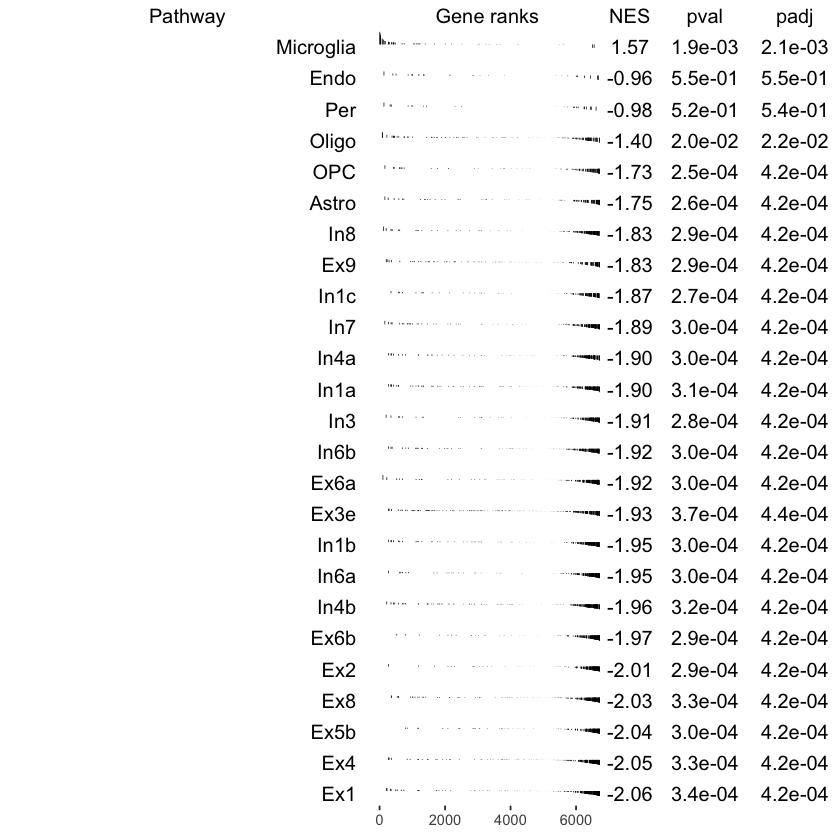

In [25]:
plotGseaTable(Wang_cellTypeMarkers_mouse[top], clrnk, fgseaRes, gseaParam = 0.5)

### Cluster 3

In [26]:
cl = disGenes[,grep("Cluster.3.",colnames(disGenes))]
Head(cl)


	object class :  matrix 



       Cluster.3.Average Cluster.3.Log2.Fold.Change Cluster.3.P.Value
P2ry13       0.002511861                 -3.9877330      4.431001e-11
Ptafr        0.005023721                 -3.3608693      1.533124e-09
C1qb         0.005023721                 -3.4027705      1.984256e-09
Cryba4       0.065308377                 -0.0820655      8.083900e-01
Irf5         0.027630467                 -2.1408369      9.562804e-10
Tgfb1        0.205972575                 -0.3842082      5.236599e-02
Tyrobp       0.002511861                 -4.0861669      6.978408e-12
Cd33         0.000000000                 -5.1217281      1.296983e-13
Fes          0.178342107                 -0.3000848      1.598083e-01
Wdfy4        0.005023721                 -3.1141813      5.646327e-08

	  matrix dimensions :  6731 3 
		is.numeric : TRUE	min= -8.059891 max= 8.731228 



In [27]:
clrnk = -log10(cl[,"Cluster.3.P.Value"] + 10E-200)*cl[,"Cluster.3.Log2.Fold.Change"]
clrnk = sort(clrnk, decreasing = T)
Head(clrnk)


	object class :  numeric 



 Named num [1:6731] 1581 1542 1437 1361 1327 ...
 - attr(*, "names")= chr [1:6731] "Hapln2" "Mobp" "Ermn" "Mog" ...

	is.numeric : TRUE	min= -824.5433 max= 1581.049 



In [28]:
fgseaRes <- fgsea(pathways = Wang_cellTypeMarkers_mouse, 
                  stats = clrnk,
                  minSize=15,
                  maxSize=500,
                  nperm=10000)

Warning message in fgsea(pathways = Wang_cellTypeMarkers_mouse, stats = clrnk, minSize = 15, :
“There are ties in the preranked stats (10.74% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”

In [29]:
tmp=as.data.frame(fgseaRes)
tmp=tmp[tmp$ES > 0,]
Head(tmp[order(tmp$pval),])


	object class :  data.frame 



   pathway         pval         padj        ES       NES
23   Oligo 0.0001486768 0.0005399102 0.8352273 1.9575814
21     Per 0.0773337926 0.0920640388 0.7407702 1.4366580
20    Endo 0.3600068835 0.3750071703 0.5538639 1.0979110
24     OPC 0.4695909162 0.4695909162 0.4448453 0.9971858

	  data.frame dimensions :  4 8 
		is.numeric : FALSE


In [30]:
top = fgseaRes[head(order(NES, decreasing = T),n=25),pathway]

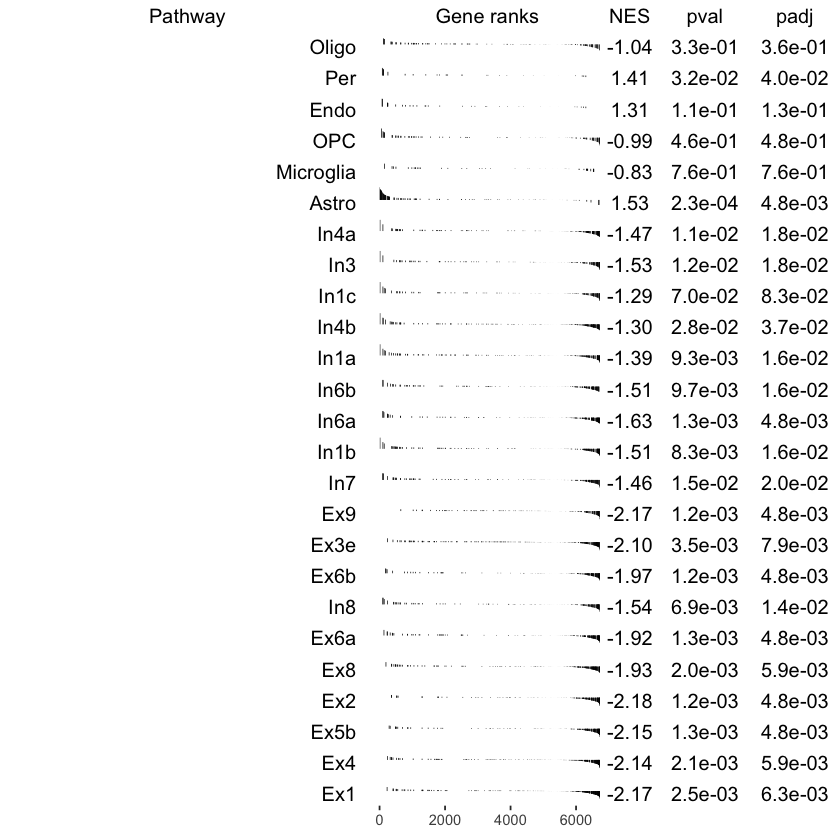

In [36]:
plotGseaTable(Wang_cellTypeMarkers_mouse[top], clrnk, fgseaRes, gseaParam = 0.5)

### Cluster 5

In [32]:
cl = disGenes[,grep("Cluster.5.",colnames(disGenes))]
Head(cl)


	object class :  matrix 



       Cluster.5.Average Cluster.5.Log2.Fold.Change Cluster.5.P.Value
P2ry13       0.004198284                 -3.6756122      4.232998e-12
Ptafr        0.000000000                 -5.2270870      2.500290e-14
C1qb         0.000000000                 -5.2688265      4.925205e-14
Cryba4       0.037784560                 -0.8888706      8.035593e-03
Irf5         0.073469978                 -0.7913016      2.080092e-03
Tgfb1        0.352655895                  0.4371092      5.185158e-03
Tyrobp       0.010495711                 -2.7664786      3.104024e-10
Cd33         0.000000000                 -5.3973257      3.719123e-16
Fes          0.153237383                 -0.5341818      8.248042e-03
Wdfy4        0.000000000                 -4.9814516      2.984894e-12

	  matrix dimensions :  6731 3 
		is.numeric : TRUE	min= -6.760964 max= 6.808646 



In [33]:
clrnk = -log10(cl[,"Cluster.5.P.Value"] + 10E-200)*cl[,"Cluster.5.Log2.Fold.Change"]
clrnk = sort(clrnk, decreasing = T)
Head(clrnk)


	object class :  numeric 



 Named num [1:6731] 1355 1345 1237 1208 1114 ...
 - attr(*, "names")= chr [1:6731] "RP23-350G1.1" "RP24-448F1.2" "Acsbg1" "Lcat" ...

	is.numeric : TRUE	min= -594.5818 max= 1354.92 



In [34]:
fgseaRes <- fgsea(pathways = Wang_cellTypeMarkers_mouse, 
                  stats = clrnk,
                  minSize=15,
                  maxSize=500,
                  nperm=10000)

Warning message in fgsea(pathways = Wang_cellTypeMarkers_mouse, stats = clrnk, minSize = 15, :
“There are ties in the preranked stats (10.73% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”

In [35]:
tmp=as.data.frame(fgseaRes)
tmp=tmp[tmp$ES > 0,]
Head(tmp[order(tmp$pval),])


	object class :  data.frame 



   pathway         pval        padj        ES      NES
22   Astro 0.0002253521 0.004781029 0.8651784 1.530065
21     Per 0.0321132127 0.040141516 0.8719798 1.405644
20    Endo 0.1111407605 0.126296319 0.8040074 1.312245

	  data.frame dimensions :  3 8 
		is.numeric : FALSE


In [37]:
top = fgseaRes[head(order(NES, decreasing = T),n=25),pathway]

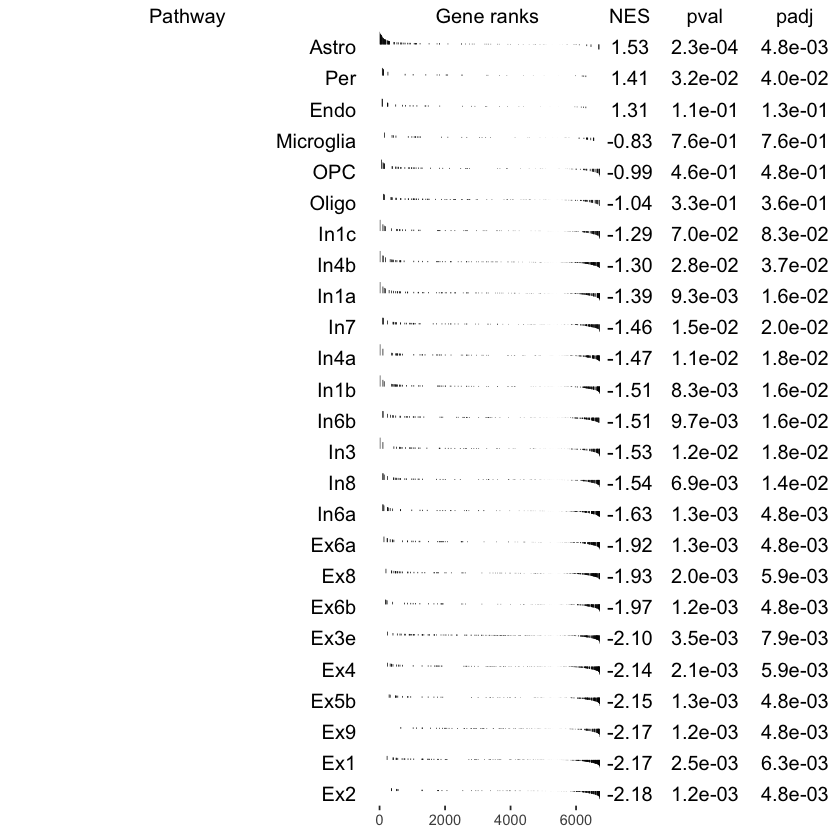

In [38]:
plotGseaTable(Wang_cellTypeMarkers_mouse[top], clrnk, fgseaRes, gseaParam = 0.5)

### Cluster 12

In [39]:
cl = disGenes[,grep("Cluster.12.",colnames(disGenes))]
Head(cl)


	object class :  matrix 



       Cluster.12.Average Cluster.12.Log2.Fold.Change Cluster.12.P.Value
P2ry13         0.00000000                   -3.071591        0.006145086
Ptafr          0.00000000                   -3.032597        0.005714207
C1qb           0.00000000                   -3.074336        0.006399008
Cryba4         0.01831925                   -1.404651        0.094560336
Irf5           0.04579812                   -1.231815        0.067157836
Tgfb1          0.11907512                   -1.087597        0.024096789
Tyrobp         0.00000000                   -3.169844        0.003475872
Cd33           0.00000000                   -3.202836        0.002604003
Fes            0.10075587                   -1.024102        0.053240663
Wdfy4          0.00000000                   -2.786961        0.017136479

	  matrix dimensions :  6731 3 
		is.numeric : TRUE	min= -6.194343 max= 5.953178 



In [40]:
clrnk = -log10(cl[,"Cluster.12.P.Value"] + 10E-200)*cl[,"Cluster.12.Log2.Fold.Change"]
clrnk = sort(clrnk, decreasing = T)
Head(clrnk)


	object class :  numeric 



 Named num [1:6731] 1185 523 406 390 289 ...
 - attr(*, "names")= chr [1:6731] "Gpr17" "Rbpjl" "Cacng4" "Olig2" ...

	is.numeric : TRUE	min= -96.14997 max= 1184.682 



In [41]:
fgseaRes <- fgsea(pathways = Wang_cellTypeMarkers_mouse, 
                  stats = clrnk,
                  minSize=15,
                  maxSize=500,
                  nperm=10000)

Warning message in fgsea(pathways = Wang_cellTypeMarkers_mouse, stats = clrnk, minSize = 15, :
“There are ties in the preranked stats (10.64% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”

In [42]:
tmp=as.data.frame(fgseaRes)
tmp=tmp[tmp$ES > 0,]
Head(tmp[order(tmp$pval),])


	object class :  data.frame 



   pathway        pval      padj        ES      NES
24     OPC 0.004721124 0.0502008 0.9095659 1.630357
21     Per 0.040146879 0.1433817 0.8738751 1.483821
12    In1c 0.063314310 0.1978572 0.7675151 1.382275
16    In6a 0.088720698 0.2214839 0.7283299 1.321140
13     In3 0.088862812 0.2214839 0.7364979 1.329758
14    In4a 0.097845507 0.2214839 0.7195958 1.305411
22   Astro 0.155952381 0.2950106 0.6952505 1.250214
23   Oligo 0.169450317 0.2950106 0.6784561 1.228526
20    Endo 0.180468373 0.2950106 0.7366203 1.261975
7     Ex6b 0.188806758 0.2950106 0.6672818 1.209609

	  data.frame dimensions :  19 8 
		is.numeric : FALSE


In [43]:
top = fgseaRes[head(order(NES, decreasing = T),n=25),pathway]

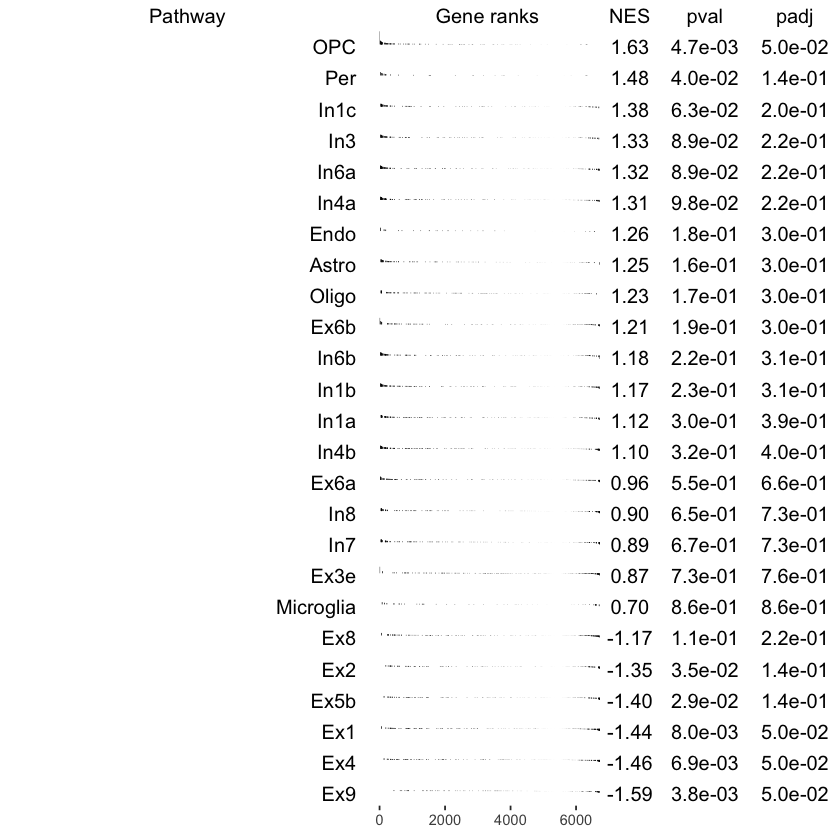

In [44]:
plotGseaTable(Wang_cellTypeMarkers_mouse[top], clrnk, fgseaRes, gseaParam = 0.5)

### Cluster 7

In [45]:
cl = disGenes[,grep("Cluster.7.",colnames(disGenes))]
Head(cl)


	object class :  matrix 



       Cluster.7.Average Cluster.7.Log2.Fold.Change Cluster.7.P.Value
P2ry13       0.009482514                 -2.7460058      6.387891e-08
Ptafr        0.002370628                 -4.0371478      1.831903e-10
C1qb         0.007111885                 -3.0734615      2.635429e-08
Cryba4       0.011853142                 -2.4032757      1.226700e-06
Irf5         0.059265710                 -1.0905475      4.309747e-04
Tgfb1        0.144608332                 -0.9103720      4.608849e-05
Tyrobp       0.000000000                 -5.1772207      4.092639e-13
Cd33         0.000000000                 -5.2102125      2.298303e-13
Fes          0.125643305                 -0.8212366      7.274169e-04
Wdfy4        0.011853142                 -2.1925415      1.745523e-05

	  matrix dimensions :  6731 3 
		is.numeric : TRUE	min= -5.583891 max= 5.279389 



In [46]:
clrnk = -log10(cl[,"Cluster.7.P.Value"] + 10E-200)*cl[,"Cluster.7.Log2.Fold.Change"]
clrnk = sort(clrnk, decreasing = T)
Head(clrnk)


	object class :  numeric 



 Named num [1:6731] 265.7 241.3 237.5 100.5 86.9 ...
 - attr(*, "names")= chr [1:6731] "Vwc2" "Slc32a1" "Gad1" "Erbb4" ...

	is.numeric : TRUE	min= -363.9767 max= 265.6763 



In [47]:
fgseaRes <- fgsea(pathways = Wang_cellTypeMarkers_mouse, 
                  stats = clrnk,
                  minSize=15,
                  maxSize=500,
                  nperm=10000)

Warning message in fgsea(pathways = Wang_cellTypeMarkers_mouse, stats = clrnk, minSize = 15, :
“There are ties in the preranked stats (10.65% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”

In [52]:
tmp=as.data.frame(fgseaRes)
tmp=tmp[tmp$ES > 0,]
Head(tmp[order(tmp$pval),])


	object class :  data.frame 



   pathway         pval        padj        ES      NES
12    In1c 0.0003236246 0.001097069 0.8967128 1.714879
19     In8 0.0003485535 0.001097069 0.8893520 1.734870
16    In6a 0.0003575259 0.001097069 0.9070059 1.786636
14    In4a 0.0003577818 0.001097069 0.9010925 1.777846
11    In1b 0.0003612717 0.001097069 0.8892520 1.770600
17    In6b 0.0003612717 0.001097069 0.9057865 1.804559
18     In7 0.0003612717 0.001097069 0.8910468 1.768131
10    In1a 0.0003750938 0.001097069 0.8808545 1.760850
15    In4b 0.0003949447 0.001097069 0.8775736 1.772761
13     In3 0.0010094213 0.002523553 0.8758370 1.696713

	  data.frame dimensions :  15 8 
		is.numeric : FALSE


In [49]:
top = fgseaRes[head(order(NES, decreasing = T),n=25),pathway]

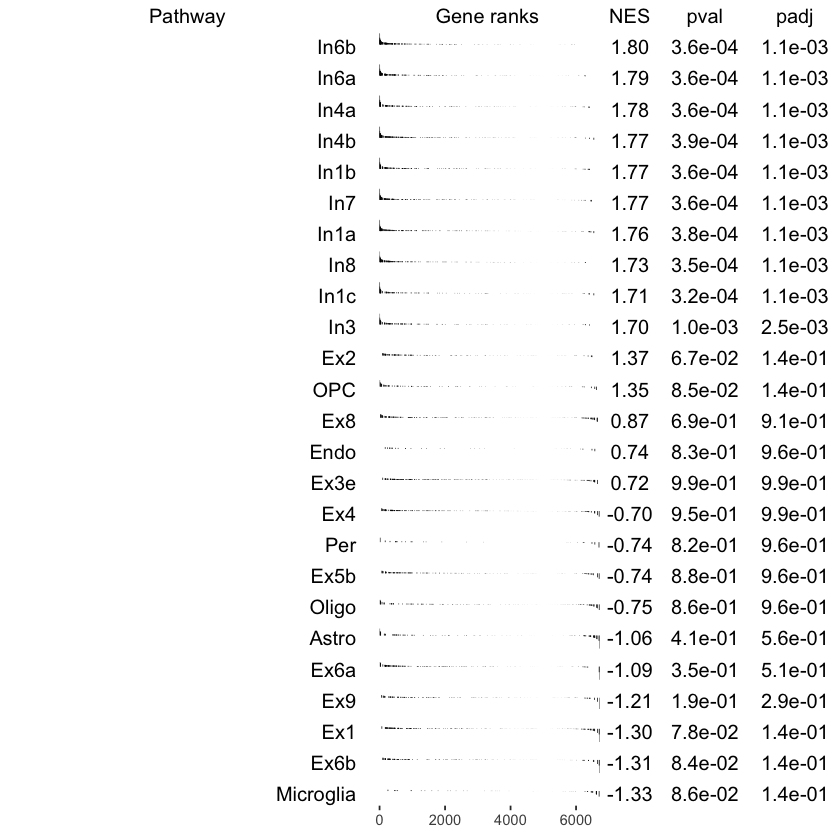

In [50]:
plotGseaTable(Wang_cellTypeMarkers_mouse[top], clrnk, fgseaRes, gseaParam = 0.5)

### Cluster 1

In [56]:
cl = disGenes[,grep("Cluster.1.",colnames(disGenes))]
clrnk = -log10(cl[,"Cluster.1.P.Value"] + 10E-200)*cl[,"Cluster.1.Log2.Fold.Change"]
clrnk = sort(clrnk, decreasing = T)
Head(clrnk)


	object class :  numeric 



 Named num [1:6731] 72.1 69.3 36.1 33.4 30.5 ...
 - attr(*, "names")= chr [1:6731] "Kcng3" "Ankrd63" "Vsig2" "Tmem132e" ...

	is.numeric : TRUE	min= -934.2706 max= 72.1463 



In [57]:
fgseaRes <- fgsea(pathways = Wang_cellTypeMarkers_mouse, 
                  stats = clrnk,
                  minSize=15,
                  maxSize=500,
                  nperm=10000)
                

Warning message in fgsea(pathways = Wang_cellTypeMarkers_mouse, stats = clrnk, minSize = 15, :
“There are ties in the preranked stats (10.74% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”

In [58]:
tmp=as.data.frame(fgseaRes)
tmp=tmp[tmp$ES > 0,]
Head(tmp[order(tmp$pval),])


	object class :  data.frame 



  pathway pval padj        ES NES
1     Ex1    1    1 0.5222544 NaN
2     Ex2    1    1 0.6463280 NaN
4     Ex4    1    1 0.2774687 NaN
5    Ex5b    1    1 0.3531915 NaN
9     Ex9    1    1 0.1652456 NaN

	  data.frame dimensions :  5 8 
		is.numeric : FALSE


In [61]:
top = fgseaRes[head(order(padj, decreasing = T),n=25),pathway]

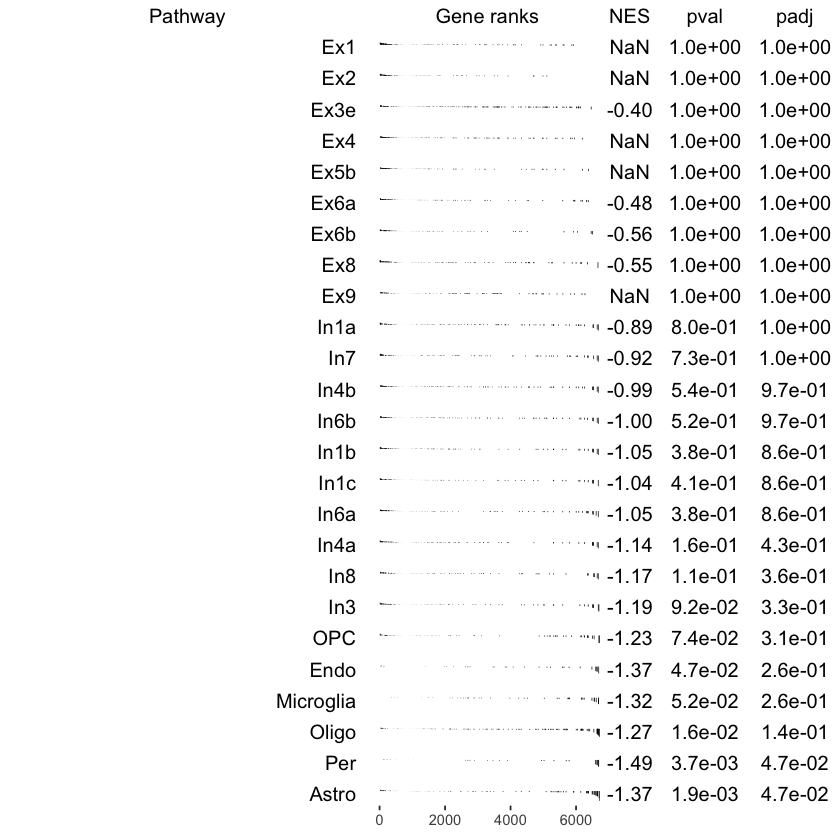

In [62]:
plotGseaTable(Wang_cellTypeMarkers_mouse[top], clrnk, fgseaRes, gseaParam = 0.5)

### Cluster 2

In [63]:
cl = disGenes[,grep("Cluster.2.",colnames(disGenes))]
clrnk = -log10(cl[,"Cluster.2.P.Value"] + 10E-200)*cl[,"Cluster.2.Log2.Fold.Change"]
clrnk = sort(clrnk, decreasing = T)
Head(clrnk)


	object class :  numeric 



 Named num [1:6731] 84.9 75.4 62.1 44.2 36.8 ...
 - attr(*, "names")= chr [1:6731] "Tiam1" "Tmem200b" "Medag" "Rims3" ...

	is.numeric : TRUE	min= -555.7247 max= 84.91555 



In [64]:
fgseaRes <- fgsea(pathways = Wang_cellTypeMarkers_mouse, 
                  stats = clrnk,
                  minSize=15,
                  maxSize=500,
                  nperm=10000)

Warning message in fgsea(pathways = Wang_cellTypeMarkers_mouse, stats = clrnk, minSize = 15, :
“There are ties in the preranked stats (10.74% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”

In [65]:
tmp=as.data.frame(fgseaRes)
tmp=tmp[tmp$ES > 0,]
Head(tmp[order(tmp$pval),])


	object class :  data.frame 



  pathway       pval      padj        ES      NES
2     Ex2 0.05263158 0.2665639 0.8248764 2.306161
5    Ex5b 0.07142857 0.2976190 0.7074303 2.018378
9     Ex9 0.10000000 0.3571429 0.4823504 1.343519
4     Ex4 0.14285714 0.3993819 0.7850295 2.180922
1     Ex1 0.20000000 0.3993819 0.5840419 1.531890
3    Ex3e 1.00000000 1.0000000 0.5061046      NaN

	  data.frame dimensions :  6 8 
		is.numeric : FALSE


In [66]:
top = fgseaRes[head(order(NES, decreasing = T),n=25),pathway]

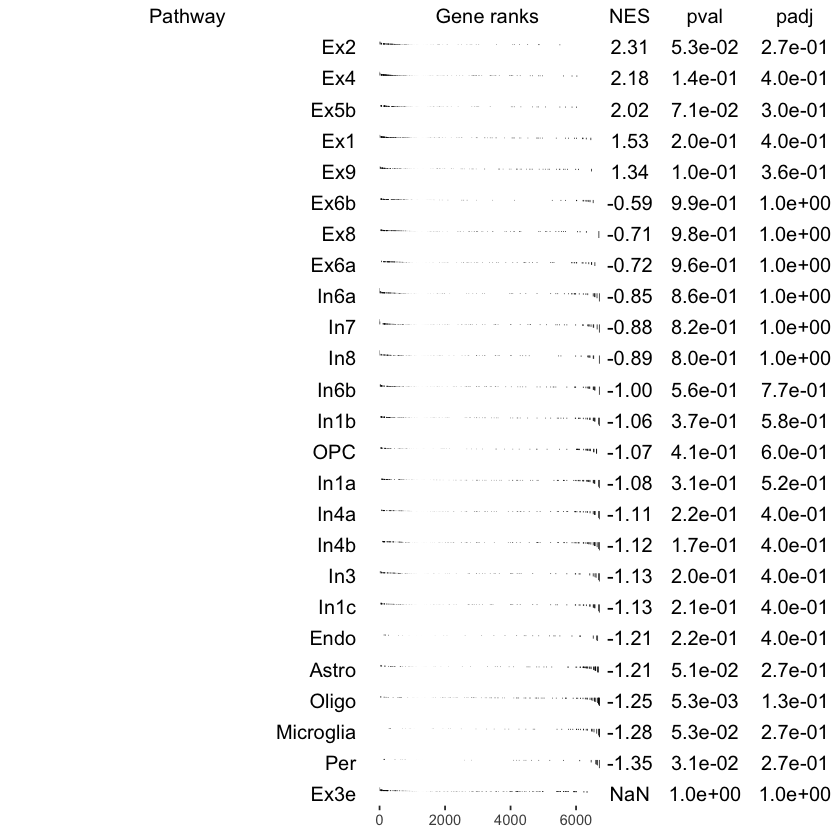

In [67]:
plotGseaTable(Wang_cellTypeMarkers_mouse[top], clrnk, fgseaRes, gseaParam = 0.5)

### Cluster 4

In [69]:
cl = disGenes[,grep("Cluster.4.",colnames(disGenes))]
clrnk = -log10(cl[,"Cluster.4.P.Value"] + 10E-200)*cl[,"Cluster.4.Log2.Fold.Change"]
clrnk = sort(clrnk, decreasing = T)
Head(clrnk)


	object class :  numeric 



 Named num [1:6731] 64.6 58.5 20.8 20 17.8 ...
 - attr(*, "names")= chr [1:6731] "Aif1" "Cyr61" "Ptpru" "Rprml" ...

	is.numeric : TRUE	min= -171.7 max= 64.5666 



In [70]:
fgseaRes <- fgsea(pathways = Wang_cellTypeMarkers_mouse, 
                  stats = clrnk,
                  minSize=15,
                  maxSize=500,
                  nperm=10000)

Warning message in fgsea(pathways = Wang_cellTypeMarkers_mouse, stats = clrnk, minSize = 15, :
“There are ties in the preranked stats (10.67% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”

In [71]:
tmp=as.data.frame(fgseaRes)
tmp=tmp[tmp$ES > 0,]
Head(tmp[order(tmp$pval),])


	object class :  data.frame 



  pathway       pval      padj        ES      NES
7    Ex6b 0.04347826 0.2941176 0.5474238 1.353375
9     Ex9 0.04347826 0.2941176 0.7439275 1.839183
5    Ex5b 0.05882353 0.2941176 0.5560615 1.381869
8     Ex8 0.14285714 0.4464286 0.4726147 1.214625
4     Ex4 0.20000000 0.4545455 0.5296711 1.384683
3    Ex3e 1.00000000 1.0000000 0.6607974      NaN

	  data.frame dimensions :  6 8 
		is.numeric : FALSE


In [72]:
top = fgseaRes[head(order(NES, decreasing = T),n=25),pathway]

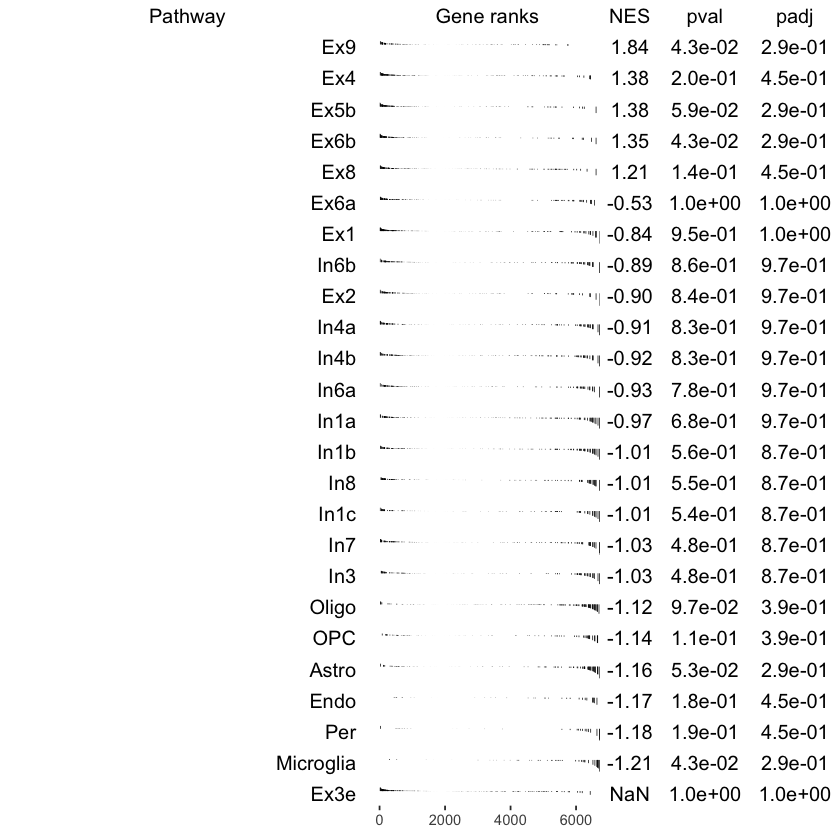

In [73]:
plotGseaTable(Wang_cellTypeMarkers_mouse[top], clrnk, fgseaRes, gseaParam = 0.5)

### Cluster 6

In [74]:
cl = disGenes[,grep("Cluster.6.",colnames(disGenes))]
clrnk = -log10(cl[,"Cluster.6.P.Value"] + 10E-200)*cl[,"Cluster.6.Log2.Fold.Change"]
clrnk = sort(clrnk, decreasing = T)
Head(clrnk)


	object class :  numeric 



 Named num [1:6731] 53.77 32.26 25.47 10.55 8.09 ...
 - attr(*, "names")= chr [1:6731] "Hs3st2" "Galnt14" "Rtn4rl2" "Blnk" ...

	is.numeric : TRUE	min= -329.6344 max= 53.76614 



In [75]:
fgseaRes <- fgsea(pathways = Wang_cellTypeMarkers_mouse, 
                  stats = clrnk,
                  minSize=15,
                  maxSize=500,
                  nperm=10000)
                  

Warning message in fgsea(pathways = Wang_cellTypeMarkers_mouse, stats = clrnk, minSize = 15, :
“There are ties in the preranked stats (10.73% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”

In [76]:
tmp=as.data.frame(fgseaRes)
tmp=tmp[tmp$ES > 0,]
Head(tmp[order(tmp$pval),])


	object class :  data.frame 



  pathway pval      padj        ES      NES
5    Ex5b  0.5 0.6944444 0.7575230 3.215188
9     Ex9  0.5 0.6944444 0.2685904 1.080602
4     Ex4  1.0 1.0000000 0.3880495      NaN
8     Ex8  1.0 1.0000000 0.4039941      NaN

	  data.frame dimensions :  4 8 
		is.numeric : FALSE


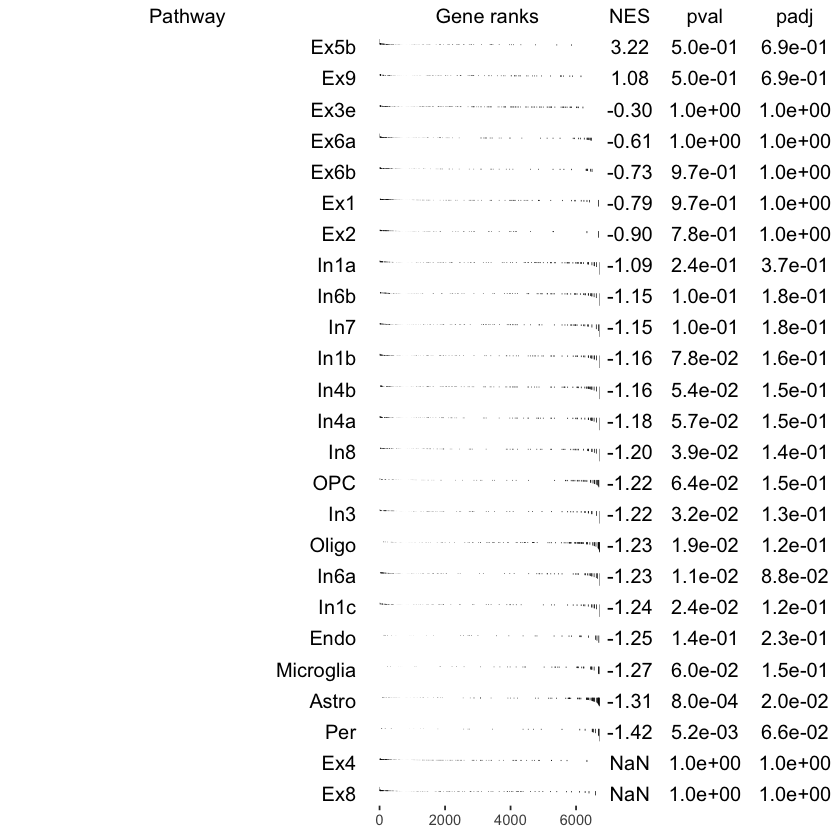

In [77]:
top = fgseaRes[head(order(NES, decreasing = T),n=25),pathway]
plotGseaTable(Wang_cellTypeMarkers_mouse[top], clrnk, fgseaRes, gseaParam = 0.5)

### Cluster 9

In [79]:
cl = disGenes[,grep("Cluster.9.",colnames(disGenes))]
clrnk = -log10(cl[,"Cluster.9.P.Value"] + 10E-200)*cl[,"Cluster.9.Log2.Fold.Change"]
clrnk = sort(clrnk, decreasing = T)
Head(clrnk)


	object class :  numeric 



 Named num [1:6731] 8.05 7.02 4.24 4.02 3.3 ...
 - attr(*, "names")= chr [1:6731] "Sh3tc1" "Myo1h" "Shh" "Wnt4" ...

	is.numeric : TRUE	min= -159.9431 max= 8.047655 



In [80]:
fgseaRes <- fgsea(pathways = Wang_cellTypeMarkers_mouse, 
                  stats = clrnk,
                  minSize=15,
                  maxSize=500,
                  nperm=10000)
                  

Warning message in fgsea(pathways = Wang_cellTypeMarkers_mouse, stats = clrnk, minSize = 15, :
“There are ties in the preranked stats (10.7% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”

In [81]:
tmp=as.data.frame(fgseaRes)
tmp=tmp[tmp$ES > 0,]
Head(tmp[order(tmp$pval),])


	object class :  data.frame 



  pathway pval padj        ES NES
5    Ex5b    1    1 0.4159340 NaN
9     Ex9    1    1 0.2463595 NaN

	  data.frame dimensions :  2 8 
		is.numeric : FALSE


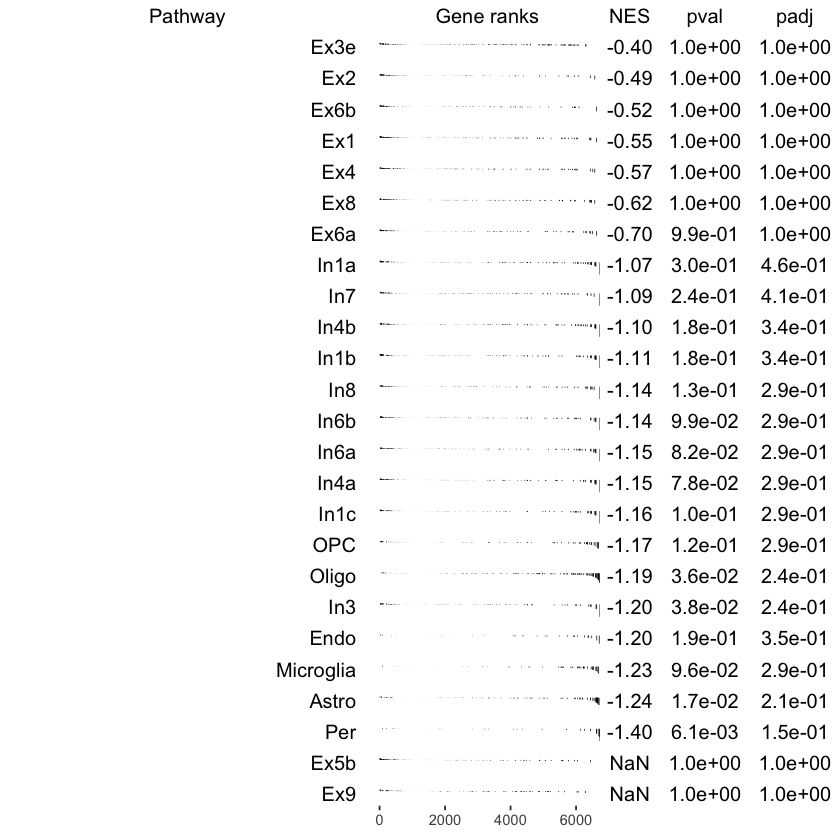

In [82]:
top = fgseaRes[head(order(NES, decreasing = T),n=25),pathway]
plotGseaTable(Wang_cellTypeMarkers_mouse[top], clrnk, fgseaRes, gseaParam = 0.5)

### Cluster 10

In [83]:
cl = disGenes[,grep("Cluster.10.",colnames(disGenes))]
clrnk = -log10(cl[,"Cluster.10.P.Value"] + 10E-200)*cl[,"Cluster.10.Log2.Fold.Change"]
clrnk = sort(clrnk, decreasing = T)
Head(clrnk)


	object class :  numeric 



 Named num [1:6731] 175.4 120.4 65.5 63.6 60.2 ...
 - attr(*, "names")= chr [1:6731] "Foxc1" "Zic2" "Tns2" "Id3" ...

	is.numeric : TRUE	min= -17.29175 max= 175.4153 



In [84]:
fgseaRes <- fgsea(pathways = Wang_cellTypeMarkers_mouse, 
                  stats = clrnk,
                  minSize=15,
                  maxSize=500,
                  nperm=10000)

Warning message in fgsea(pathways = Wang_cellTypeMarkers_mouse, stats = clrnk, minSize = 15, :
“There are ties in the preranked stats (10.73% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”

In [85]:
tmp=as.data.frame(fgseaRes)
tmp=tmp[tmp$ES > 0,]
Head(tmp[order(tmp$pval),])


	object class :  data.frame 



     pathway        pval      padj        ES      NES
20      Endo 0.004785187 0.1196297 0.8342617 1.646578
21       Per 0.027722356 0.1923077 0.7516181 1.467276
22     Astro 0.031278195 0.1923077 0.6596453 1.358050
23     Oligo 0.256533494 0.3121504 0.5313276 1.098810
25 Microglia 0.262206333 0.3121504 0.5630897 1.133148

	  data.frame dimensions :  5 8 
		is.numeric : FALSE


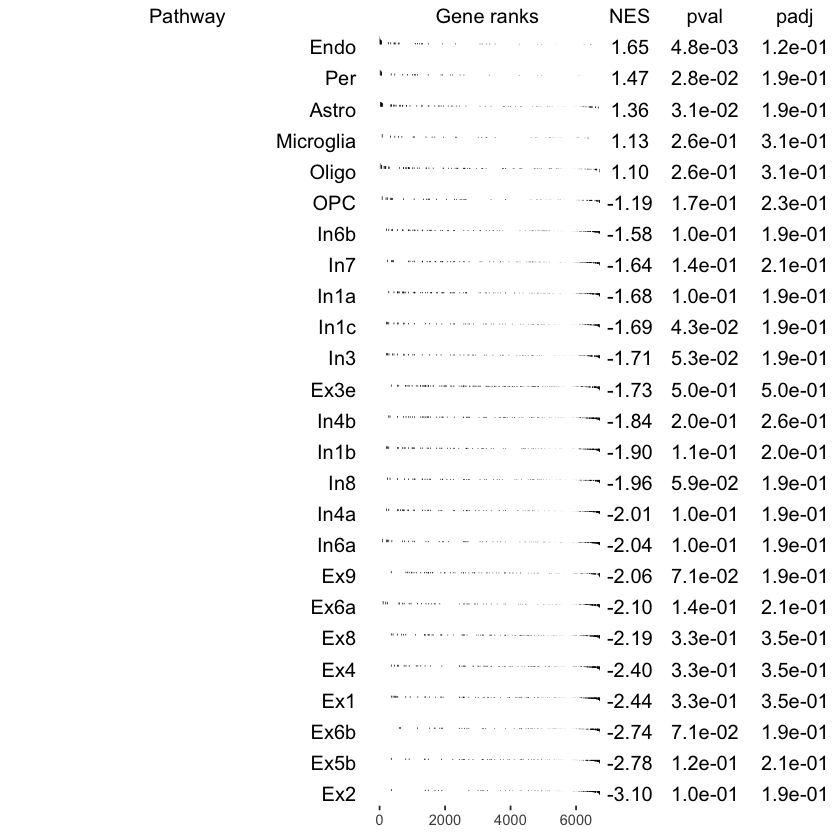

In [86]:
top = fgseaRes[head(order(NES, decreasing = T),n=25),pathway]
plotGseaTable(Wang_cellTypeMarkers_mouse[top], clrnk, fgseaRes, gseaParam = 0.5)

### Cluster 11

In [88]:
cl = disGenes[,grep("Cluster.11.",colnames(disGenes))]
clrnk = -log10(cl[,"Cluster.11.P.Value"] + 10E-200)*cl[,"Cluster.11.Log2.Fold.Change"]
clrnk = sort(clrnk, decreasing = T)
Head(clrnk)


	object class :  numeric 



 Named num [1:6731] 139.4 125.9 104.9 97 84.3 ...
 - attr(*, "names")= chr [1:6731] "Ppp1r1b" "Slc32a1" "Pde1b" "Rasgrp2" ...

	is.numeric : TRUE	min= -109.3623 max= 139.3745 



In [89]:
fgseaRes <- fgsea(pathways = Wang_cellTypeMarkers_mouse, 
                  stats = clrnk,
                  minSize=15,
                  maxSize=500,
                  nperm=10000)

Warning message in fgsea(pathways = Wang_cellTypeMarkers_mouse, stats = clrnk, minSize = 15, :
“There are ties in the preranked stats (10.65% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”

In [90]:
tmp=as.data.frame(fgseaRes)
tmp=tmp[tmp$ES > 0,]
Head(tmp[order(tmp$pval),])


	object class :  data.frame 



   pathway        pval      padj        ES      NES
1      Ex1 0.005376344 0.1344086 0.6048483 1.497861
8      Ex8 0.023845007 0.1490313 0.5480056 1.333150
2      Ex2 0.037194474 0.1713728 0.5601444 1.316504
3     Ex3e 0.043778802 0.1713728 0.4832377 1.209858
18     In7 0.075085324 0.1995439 0.5260480 1.248348
5     Ex5b 0.079817560 0.1995439 0.5211165 1.240334
14    In4a 0.091007584 0.2068354 0.5200771 1.228605
7     Ex6b 0.139059305 0.2897069 0.4982279 1.168730
17    In6b 0.211334120 0.4064118 0.4645051 1.105218
15    In4b 0.269727403 0.4531665 0.4415460 1.069098

	  data.frame dimensions :  15 8 
		is.numeric : FALSE


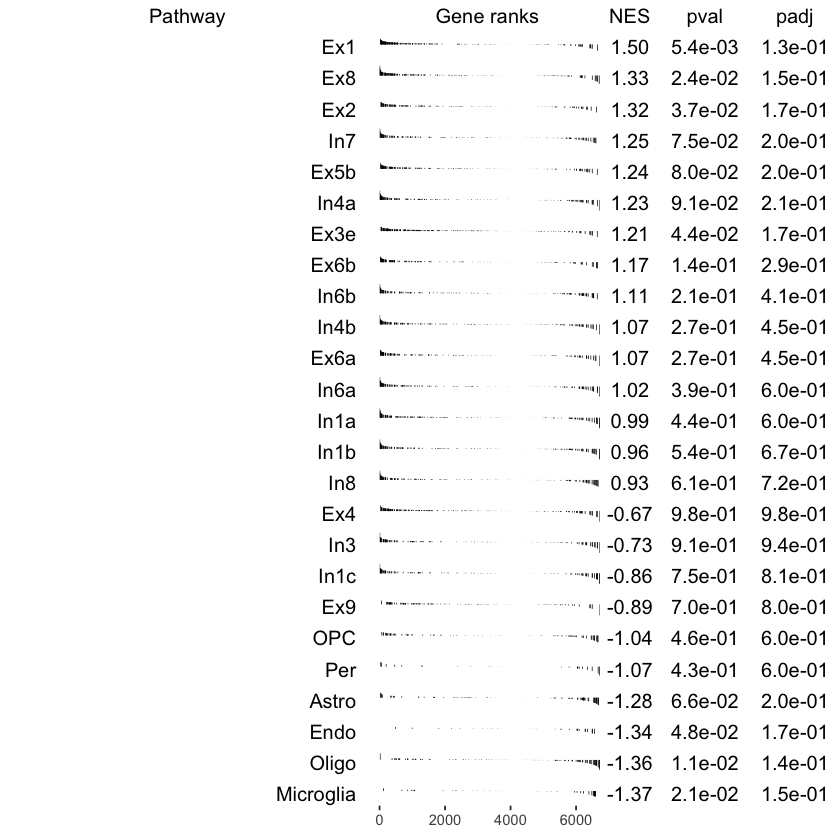

In [91]:
top = fgseaRes[head(order(NES, decreasing = T),n=25),pathway]
plotGseaTable(Wang_cellTypeMarkers_mouse[top], clrnk, fgseaRes, gseaParam = 0.5)

### Cluster 13

In [92]:
cl = disGenes[,grep("Cluster.13.",colnames(disGenes))]
clrnk = -log10(cl[,"Cluster.13.P.Value"] + 10E-200)*cl[,"Cluster.13.Log2.Fold.Change"]
clrnk = sort(clrnk, decreasing = T)
Head(clrnk)


	object class :  numeric 



 Named num [1:6731] 6.44 6.03 5.42 4.61 4.58 ...
 - attr(*, "names")= chr [1:6731] "Tox2" "Hs3st2" "Rhbdl3" "Ncf4" ...

	is.numeric : TRUE	min= -83.46426 max= 6.443656 



In [93]:
fgseaRes <- fgsea(pathways = Wang_cellTypeMarkers_mouse, 
                  stats = clrnk,
                  minSize=15,
                  maxSize=500,
                  nperm=10000)

Warning message in fgsea(pathways = Wang_cellTypeMarkers_mouse, stats = clrnk, minSize = 15, :
“There are ties in the preranked stats (10.65% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”

In [94]:
tmp=as.data.frame(fgseaRes)
tmp=tmp[tmp$ES > 0,]
Head(tmp[order(tmp$pval),])


	object class :  data.frame 



   pathway pval padj ES NES
NA    <NA>   NA   NA NA  NA

	  data.frame dimensions :  0 8 
		is.numeric : FALSE


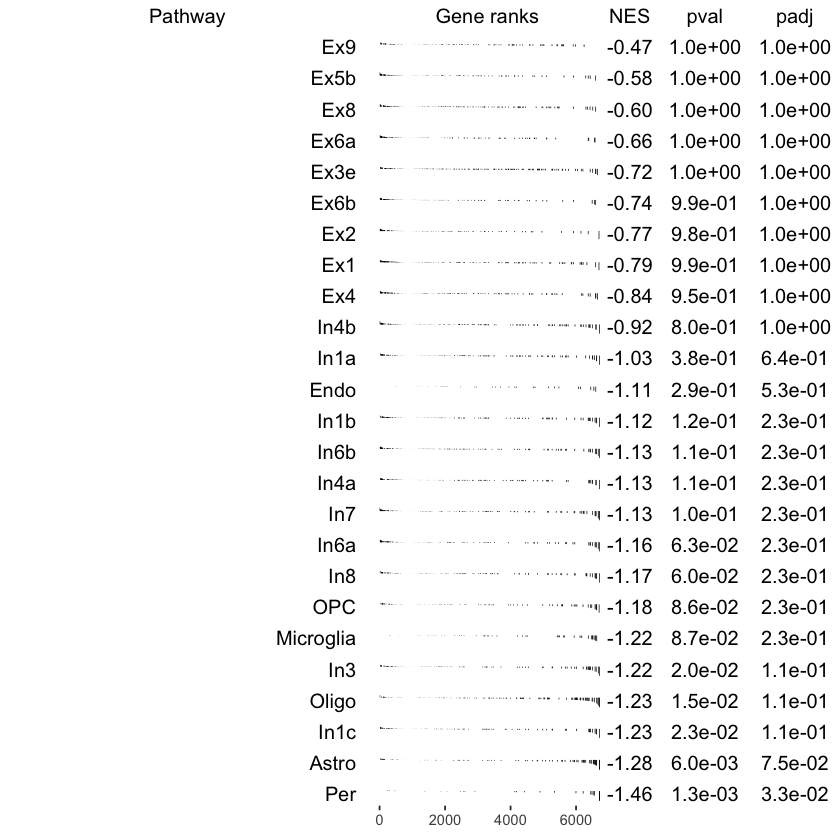

In [95]:
top = fgseaRes[head(order(NES, decreasing = T),n=25),pathway]
plotGseaTable(Wang_cellTypeMarkers_mouse[top], clrnk, fgseaRes, gseaParam = 0.5)